In [ ]:
# https://github.com/gcdart/MulticlassClassifier/blob/master/src/ml/LogisticRegression.java
# https://www.kaggle.com/c/lshtc/discussion/6911#38233 - preprocessing: multilabels comma should not have spaces
# https://www.kaggle.com/c/lshtc/discussion/14048 - dataset statistics
## reading the LWIKI, SWIKI dataset

In [1]:
import os
import numpy as np
import pandas as pd
import igraph as ig

from pathlib import Path
from tqdm import tqdm #always use this instead of `import tqdm`
# from sklearn.datasets import fetch_rcv1
from scipy.sparse import *
# np.random.seed(123)
import warnings
warnings.simplefilter('ignore')

In [2]:
import logging
from collections import OrderedDict, Counter

logging.basicConfig(level=logging.INFO, )

In [3]:
from scripts.src.hierarchy import *
from scripts.src.label_utils import *
from scripts.src.data_reading import *

import matplotlib.pyplot as plt
%matplotlib inline

In [5]:
o = OmniscienceReader("OmniScience/original/ArXiv_BMED_Evise_title_abstract_os.2018-07-11.tsv")

100%|██████████████████████████████████████████████████████████████████████| 853165/853165 [00:08<00:00, 101490.44it/s]


In [146]:
om_df = o.om_df

853142

In [136]:
groups = om_df.groupby("used_as")
om_train = groups.get_group('training')
om_valid = groups.get_group('validation')
om_test = groups.get_group('unused')

In [4]:
T = HierarchyUtils("OmniScience/original/os_tree_cat_hier_labels.txt", True, True)

143052it [00:00, 259715.50it/s]


100%|███████████████████████████████████████████████████████████████████████████████| 35/35 [00:00<00:00, 69409.29it/s]


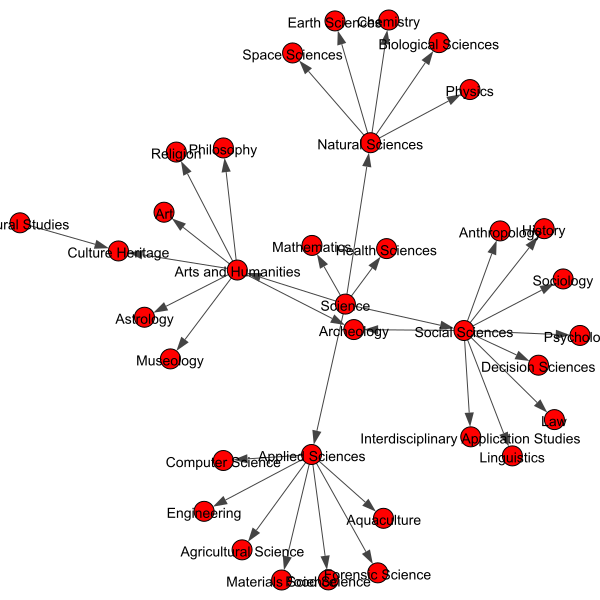

In [5]:
T.draw_graph(35)

In [29]:
Tn = HierarchyUtils("OmniScience/original/os_tree_cat_hier.txt", True, False)

143052it [00:00, 292415.79it/s]


In [31]:
Tn.node2id[253046970], T.id2node[255]

(255, 'Biological Sciences Research Methodologies')

In [3]:
Tn.island_checker()

INFO:root:No islands exist. There is only one fully connected component


False

In [2]:
T = HierarchyUtils("lwiki/hierarchy/hierarchy.txt", False, False)

863261it [00:04, 211556.71it/s]


In [4]:
T = HierarchyUtils("swiki/data/cat_hier.txt", True, False)

65333it [00:00, 227831.18it/s]


In [8]:
T = HierarchyUtils("rcv1.tar/RCV1_1/rcv1.topic.hierarchy", False, False)

35it [00:00, 34861.23it/s]


In [22]:
T.id2node[74]

115

In [21]:
T.hier_obj.get_shortest_paths(0, T.node2id[115])

[[0, 4, 74]]

In [6]:
T = HierarchyUtils("DMOZ/cat_hier.txt", True, True)

35437it [00:00, 270828.79it/s]


In [ ]:
# df = rr_reader("swiki/data/train.txt")

<img src = "image.png">